In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,137461.0,-8.306003,3.476622,-5.719648,-2.355750,0.115083,3.220268,0.203877,2.074125,4.326811,...,-1.427175,-1.190416,-0.517093,0.695963,0.510635,-0.043861,-0.367309,-0.245450,89.99,0
1,26781.0,-4.258460,4.732592,-1.822174,-0.253790,-0.328965,-0.964438,0.804594,0.050050,3.124953,...,-0.399021,0.357081,0.292715,0.028207,0.275601,-0.299998,2.547237,1.436274,1.79,0
2,96745.0,-3.421542,-3.329408,1.351898,0.572392,3.151252,-2.546831,-1.895510,-0.062868,2.246771,...,-0.011259,0.556045,-0.560193,-0.117244,-0.431460,-0.300893,0.555971,0.028417,150.00,0
3,75576.0,-1.789607,-0.084165,0.177868,0.489115,-0.337169,-0.738146,0.872926,0.083005,-0.494166,...,0.001052,0.517190,0.775105,0.593087,0.079656,0.318322,-0.372209,0.093478,143.75,0
4,43419.0,1.427157,-0.279882,-0.294539,-0.858603,-0.329932,-0.864006,-0.070960,-0.296698,-1.535303,...,0.232263,0.613804,-0.229635,0.084960,0.838847,-0.085841,-0.027128,-0.009187,15.00,0


In [4]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


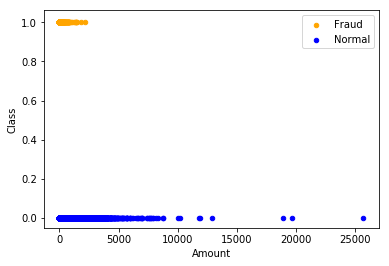

This feature looks important based on their distribution with respect to class.


In [5]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")


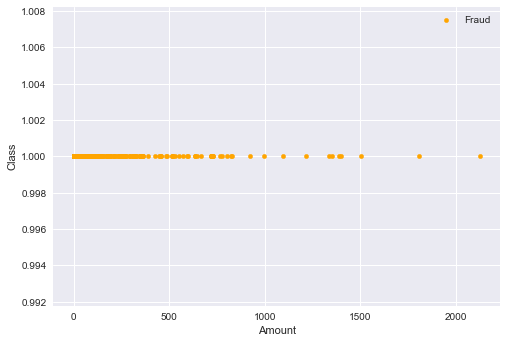

In [6]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

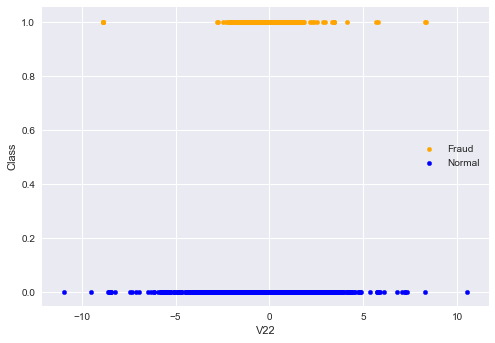

This feature may not be very important because of the similar distribution.


In [7]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression

In [8]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 154 0.0015448973245187243
Number of frauds on y_train: 338 0.0018258032453922777


In [10]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.998966724517


In [11]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted      0    1  __all__
Actual                        
0          99486   43    99529
1             60   94      154
__all__    99546  137    99683


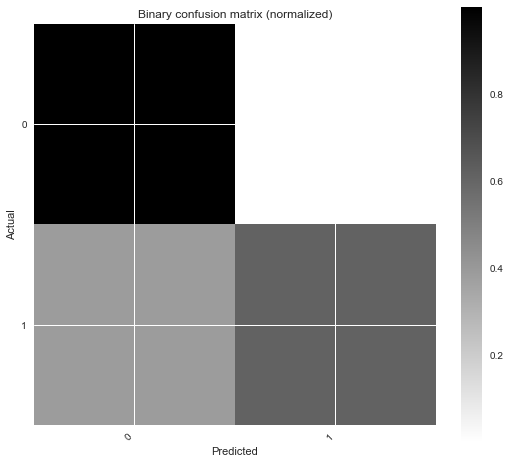

population: 99683
P: 154
N: 99529
PositiveTest: 137
NegativeTest: 99546
TP: 94
TN: 99486
FP: 43
FN: 60
TPR: 0.61038961039
TNR: 0.999567965116
PPV: 0.686131386861
NPV: 0.999397263577
FPR: 0.000432034884305
FDR: 0.313868613139
FNR: 0.38961038961
ACC: 0.998966724517
F1_score: 0.646048109966
MCC: 0.646640080385
informedness: 0.609957575505
markedness: 0.685528650438
prevalence: 0.00154489732452
LRP: 1412.82482634
LRN: 0.389778787644
DOR: 3624.68372093
FOR: 0.000602736423362


In [12]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [13]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.38961038961038963


# Logistic Regression with balanced class weights

In [19]:
best_c, best_fnr = 1, 1
for _ in range(20):
    c = random.uniform(1, 10000)
    logistic = linear_model.LogisticRegression(C=c, class_weight="balanced")
    logistic.fit(X_train, y_train)
    #print("Score: ", logistic.score(X_test, y_test))
    y_predicted2 = np.array(logistic.predict(X_test))
    y_right2 = np.array(y_test)
    confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
    #print("Confusion matrix:\n%s" % confusion_matrix2)
    #confusion_matrix2.plot(normalized=True)
    #plt.show()
    #confusion_matrix2.print_stats()
    fnr = confusion_matrix2.stats()['FNR']
    if fnr < best_fnr:
        best_fnr = fnr
        best_c = c
print("Best C is {0} with best FNR of {1}.".format(best_c, best_fnr))

Best C is 5315.534060359721 with best FNR of 0.09740259740259741.
